**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [3]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Indian Sign Language /PRAICP-1000-IndiSignLang.zip", 'r') as zip_ref:

    zip_ref.extractall("/content/extracted_images")

In [4]:
myimg = mpimg.imread("/content/extracted_images/Data/A/001.jpg")

myimg2 = cv2.imread("/content/extracted_images/Data/A/001.jpg")

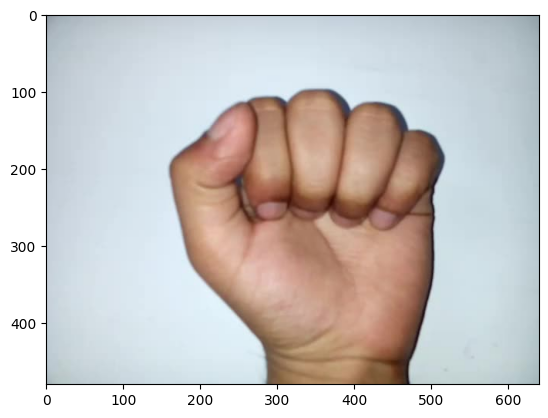

In [5]:
plt.imshow(myimg)

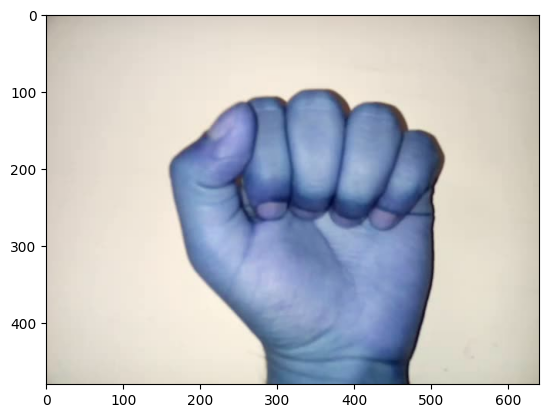

In [6]:
plt.imshow(myimg2)

In [7]:
myimg.shape

(480, 640, 3)

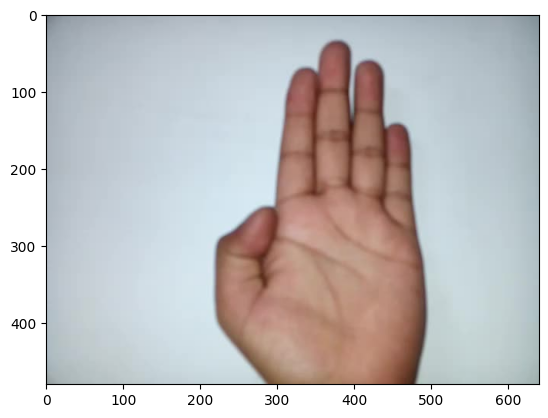

In [8]:
myimg = mpimg.imread("/content/extracted_images/Data/B/001.jpg")
plt.imshow(myimg)

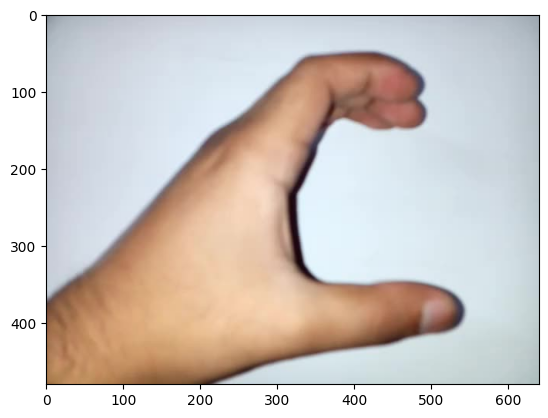

In [9]:
myimg = mpimg.imread("/content/extracted_images/Data/C/001.jpg")
plt.imshow(myimg)

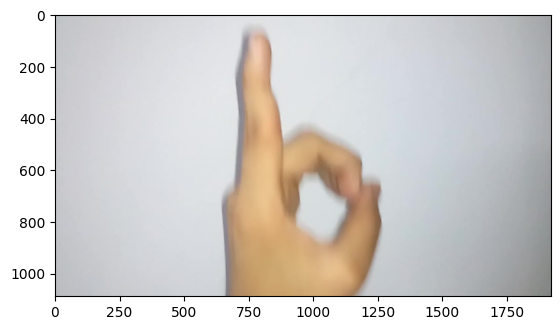

In [10]:
myimg = mpimg.imread("/content/extracted_images/Data/D/002.jpg")
plt.imshow(myimg)

**Data Preprocessing**
**1.Load and Format Images:-**Read image files and their corresponding labels (letters A-Y).

In [11]:
dataset_path = "/content/extracted_images/Data"  # Update with the actual path if needed

images = []
labels = []

# Loop through folders (A-Y) and load images
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                img = cv2.resize(img, (64, 64))  # Resize to 64x64
                img = img / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(class_name)  # Use folder name as label

In [12]:
# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [13]:
# Reshape images for CNN input
images = images.reshape(-1, 64, 64, 1)  # (num_samples, img_height, img_width, num_channels)

In [14]:
# One-hot encode labels (optional, but recommended)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

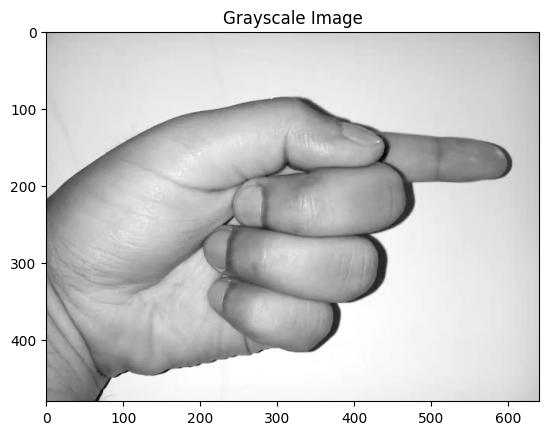

In [15]:
image = cv2.imread("/content/extracted_images/Data/G/001.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('on')
plt.show()

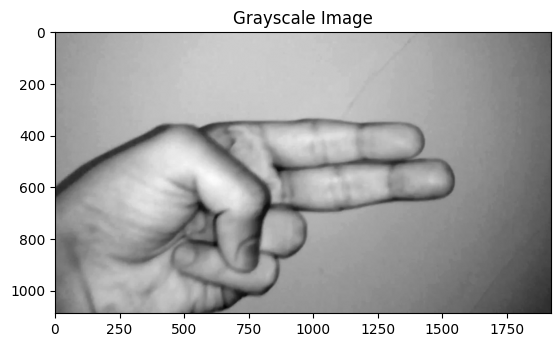

In [16]:
image = cv2.imread("/content/extracted_images/Data/H/002.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('on')
plt.show()

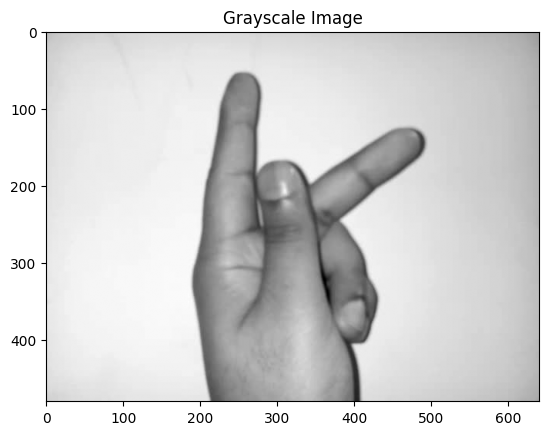

In [17]:
image = cv2.imread("/content/extracted_images/Data/K/002.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('on')
plt.show()

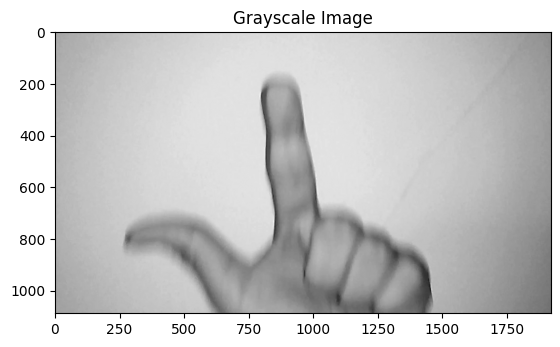

In [18]:
image = cv2.imread("/content/extracted_images/Data/L/003.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('on')
plt.show()

**Data splitting:-**Divide the dataset into training and testing sets.

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

**Build The CNN Model**

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))  # 24 classes for A-Y

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train the Model**

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9867 - loss: 0.0404 - val_accuracy: 0.9970 - val_loss: 0.0081
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9875 - loss: 0.0417 - val_accuracy: 0.9950 - val_loss: 0.0134
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9856 - loss: 0.0389 - val_accuracy: 0.9960 - val_loss: 0.0091
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9980 - val_loss: 0.0046
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9865 - loss: 0.0405 - val_accuracy: 0.9940 - val_loss: 0.0163
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9885 - loss: 0.0318 - val_accuracy: 0.9970 - val_loss: 0.0123
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9883 - loss: 0.0351 - val_accuracy: 0.9980 - val_loss: 0.0077
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9864 - loss: 0.0382 - val_acc

In [26]:
Test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.0047
Test accuracy: 99.80%


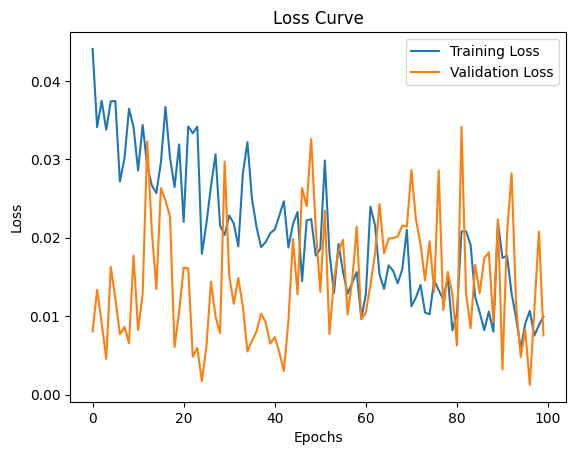

In [30]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

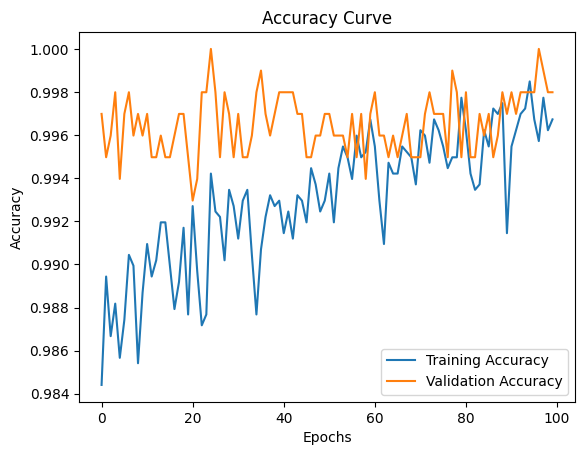

In [31]:
   plt.plot(history.history['accuracy'], label='Training Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.title('Accuracy Curve')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show()

**Prediction:-**Use the model to predict sign language gestures from new images:

In [33]:
model.save('indian_sign_language_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


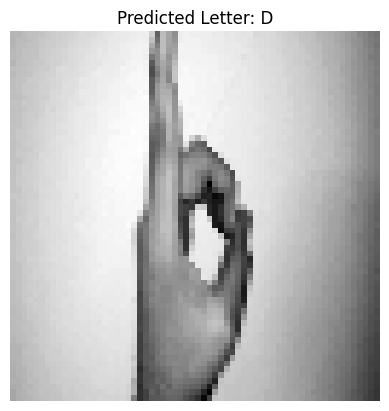

In [40]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/indian_sign_language_model.h5')

image_path = '/content/extracted_images/Data/D/004.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (64, 64))
image = image / 255.0
image_for_prediction = image.reshape(1, 64, 64, 1)

prediction = model.predict(image_for_prediction)
predicted_class_index = np.argmax(prediction)

letters = 'ABCDEFGHIKLMNOPQRSTUVWXY'
predicted_letter = letters[predicted_class_index]

plt.imshow(image, cmap='gray')
plt.title(f"Predicted Letter: {predicted_letter}")
plt.axis('off')
plt.show()